In [1]:
from trueskill import *
import pandas as pd

In [2]:
def sort_ranks(d):
    return sorted(d.items(), key=operator.itemgetter(1))

In [3]:
import random
random.seed(0)

data = pd.DataFrame(columns = ["id","speed", "bodyAngleZ"])
N = 50

for i in range(0,N):
    s = random.uniform(0.02, 0.8)
    b = random.uniform(-0.7, 0.7)
    data.loc[i] = [i,s,b]

In [4]:
# combinedMetric = data["speed"]/data["gaitDuration"]
# combined_df = pd.DataFrame(combinedMetric,data.index, columns =["combined"])
# combined_df

combinedMetric = data["speed"].apply(lambda x: pow(x,2)) - data["bodyAngleZ"].apply(lambda x: pow(x,3))
combined_df = pd.DataFrame(combinedMetric,data.index, columns =["combined"])
combined_df

combined
0   0.413465
1   0.159585
2   0.177746
3   0.419498
4   0.151874
5   0.530461
6   0.011589
7   0.294948
8   0.223541
9   0.246580
10  0.035286
11  0.502887
12  0.325449
13  0.124891
14  0.257278
15  0.019944
16 -0.028065
17  0.515597
18  0.340833
19  0.427025
20  0.000437
21  0.531518
22 -0.064634
23  0.027728
24 -0.237955
25  0.418323
26  0.022836
27 -0.049292
28  0.010669
29  0.325883
30  0.429218
31  0.592651
32  0.229267
33  0.239510
34  0.245261
35  0.112493
36  0.237417
37  0.342787
38  0.226475
39  0.437743
40  0.311422
41  0.198595
42  0.356030
43  0.309370
44  0.513724
45  0.577453
46  0.126676
47  0.436450
48  0.607928
49  0.247982

In [5]:
data_all = pd.concat([data, combined_df], axis = 1,join_axes=[data.index])

In [6]:
data_all

id     speed  bodyAngleZ  combined
0    0.0  0.678649    0.361136  0.413465
1    1.0  0.348046   -0.337517  0.159585
2    2.0  0.418794   -0.133092  0.177746
3    3.0  0.631363   -0.275362  0.419498
4    4.0  0.391746    0.116735  0.151874
5    5.0  0.728328    0.006562  0.530461
6    6.0  0.239834    0.358126  0.011589
7    7.0  0.502328   -0.349291  0.294948
8    8.0  0.729602    0.675900  0.223541
9    9.0  0.651969    0.563032  0.246580
10  10.0  0.261915    0.321764  0.035286
11  11.0  0.721094    0.257578  0.502887
12  12.0  0.388271   -0.559018  0.325449
13  13.0  0.358654    0.155242  0.124891
14  14.0  0.732149    0.653249  0.257278
15  15.0  0.392068    0.511434  0.019944
16  16.0  0.223184    0.427039 -0.028065
17  17.0  0.447985   -0.680342  0.515597
18  18.0  0.581370   -0.141647  0.340833
19  19.0  0.663379    0.235414  0.427025
20  20.0  0.020891   -0.008991  0.000437
21  21.0  0.696730   -0.358525  0.531518
22  22.0  0.273659    0.518660 -0.064634
23  23.0  0.169032    0.094515  0.027728
24  24.0  0.206120    0.654556 -0.237955
25  25.0  0.646480   -0.072843  0.418323
26  26.0  0.082748   -0.251924  0.022836
27  27.0  0.416194    0.605967 -0.049292
28  28.0  0.105065    0.071774  0.010669
29  29.0  0.571118    0.066417  0.325883
30  30.0  0.655284    0.056397  0.429218
31  31.0  0.771794    0.144460  0.592651
32  32.0  0.478341   -0.077015  0.229267
33  33.0  0.485104   -0.161138  0.239510
34  34.0  0.469008   -0.293539  0.245261
35  35.0  0.167725   -0.438579  0.112493
36  36.0  0.497963    0.219323  0.237417
37  37.0  0.391694   -0.574246  0.342787
38  38.0  0.610931    0.527479  0.226475
39  39.0  0.740237    0.479444  0.437743
40  40.0  0.720575    0.592315  0.311422
41  41.0  0.441668   -0.152186  0.198595
42  42.0  0.570121   -0.314112  0.356030
43  43.0  0.653070    0.489280  0.309370
44  44.0  0.718130    0.125722  0.513724
45  45.0  0.760817    0.111573  0.577453
46  46.0  0.371439    0.224344  0.126676
47  47.0  0.797081    0.583718  0.436450
48  48.0  0.638794   -0.584678  0.607928
49  49.0  0.497971   -0.018978  0.247982

In [7]:
# create a rating dataframe..
automatedRating_df = pd.DataFrame(columns=['activeSelection','id1','id2'])
count = 0
for index,i in enumerate(data["id"]):
    #print(index,i)
    for j in data["id"][index:]:
        if(i!=j):
            #print (i,j)
            if(data_all.loc[data_all['id'] == i, 'combined'].iloc[0] > data_all.loc[data_all['id'] == j, 'combined'].iloc[0]):
                automatedRating_df.loc[count]=[1,i,j]
            else:
                automatedRating_df.loc[count]=[2,i,j]
            count = count + 1
automatedRating_df

activeSelection   id1   id2
0                 1.0   0.0   1.0
1                 1.0   0.0   2.0
2                 2.0   0.0   3.0
3                 1.0   0.0   4.0
4                 2.0   0.0   5.0
5                 1.0   0.0   6.0
6                 1.0   0.0   7.0
7                 1.0   0.0   8.0
8                 1.0   0.0   9.0
9                 1.0   0.0  10.0
10                2.0   0.0  11.0
11                1.0   0.0  12.0
12                1.0   0.0  13.0
13                1.0   0.0  14.0
14                1.0   0.0  15.0
15                1.0   0.0  16.0
16                2.0   0.0  17.0
17                1.0   0.0  18.0
18                2.0   0.0  19.0
19                1.0   0.0  20.0
20                2.0   0.0  21.0
21                1.0   0.0  22.0
22                1.0   0.0  23.0
23                1.0   0.0  24.0
24                2.0   0.0  25.0
25                1.0   0.0  26.0
26                1.0   0.0  27.0
27                1.0   0.0  28.0
28                1.0   0.0  29.0
29                2.0   0.0  30.0
...               ...   ...   ...
1195              2.0  41.0  48.0
1196              2.0  41.0  49.0
1197              1.0  42.0  43.0
1198              2.0  42.0  44.0
1199              2.0  42.0  45.0
1200              1.0  42.0  46.0
1201              2.0  42.0  47.0
1202              2.0  42.0  48.0
1203              1.0  42.0  49.0
1204              2.0  43.0  44.0
1205              2.0  43.0  45.0
1206              1.0  43.0  46.0
1207              2.0  43.0  47.0
1208              2.0  43.0  48.0
1209              1.0  43.0  49.0
1210              2.0  44.0  45.0
1211              1.0  44.0  46.0
1212              1.0  44.0  47.0
1213              2.0  44.0  48.0
1214              1.0  44.0  49.0
1215              1.0  45.0  46.0
1216              1.0  45.0  47.0
1217              2.0  45.0  48.0
1218              1.0  45.0  49.0
1219              2.0  46.0  47.0
1220              2.0  46.0  48.0
1221              2.0  46.0  49.0
1222              2.0  47.0  48.0
1223              1.0  47.0  49.0
1224              1.0  48.0  49.0

[1225 rows x 3 columns]

In [8]:
#sub_df = pd.read_csv('syntheticDataSpeedGaitTimeHappyRankings.csv', lineterminator='\n')
# sub_df = pd.read_csv('syntheticExperiments\\syntheticDataBodyAngleSpeedHappyRankings.csv', lineterminator='\n')
# sub_df.rename(columns={"id2\r": "id2"},inplace=True)

sub_df = automatedRating_df

In [9]:
def ts_result(id1, id2, ratings, drawn):
    new_id1, new_id2 = rate_1vs1(ratings[id1], ratings[id2], drawn)
    ratings[id1] = new_id1
    ratings[id2] = new_id2

In [10]:
# initialize ratings
designs = data["id"]
ts_ratings = {d:Rating() for d in designs}
ts_ratings

{0.0: trueskill.Rating(mu=25.000, sigma=8.333),
 1.0: trueskill.Rating(mu=25.000, sigma=8.333),
 2.0: trueskill.Rating(mu=25.000, sigma=8.333),
 3.0: trueskill.Rating(mu=25.000, sigma=8.333),
 4.0: trueskill.Rating(mu=25.000, sigma=8.333),
 5.0: trueskill.Rating(mu=25.000, sigma=8.333),
 6.0: trueskill.Rating(mu=25.000, sigma=8.333),
 7.0: trueskill.Rating(mu=25.000, sigma=8.333),
 8.0: trueskill.Rating(mu=25.000, sigma=8.333),
 9.0: trueskill.Rating(mu=25.000, sigma=8.333),
 10.0: trueskill.Rating(mu=25.000, sigma=8.333),
 11.0: trueskill.Rating(mu=25.000, sigma=8.333),
 12.0: trueskill.Rating(mu=25.000, sigma=8.333),
 13.0: trueskill.Rating(mu=25.000, sigma=8.333),
 14.0: trueskill.Rating(mu=25.000, sigma=8.333),
 15.0: trueskill.Rating(mu=25.000, sigma=8.333),
 16.0: trueskill.Rating(mu=25.000, sigma=8.333),
 17.0: trueskill.Rating(mu=25.000, sigma=8.333),
 18.0: trueskill.Rating(mu=25.000, sigma=8.333),
 19.0: trueskill.Rating(mu=25.000, sigma=8.333),
 20.0: trueskill.Rating(mu=25.

In [11]:
# then, we go through each of the comparisons and add them to the model
for i, row in sub_df.iterrows():
    #print(row)
    if row.activeSelection == 0: # draw
        ts_result(row.id1, row.id2, ts_ratings, drawn=True)
    elif row.activeSelection == 1: # id1 wins
        ts_result(row.id1, row.id2, ts_ratings, drawn=False)
    elif row.activeSelection == 2: # id2 wins
        ts_result(row.id2, row.id1, ts_ratings, drawn=False)
        
#ranks = ranking_ts_dict(ts_ratings) # rank is sorting based on score..

In [12]:
ts_ratings

{0.0: trueskill.Rating(mu=30.769, sigma=1.919),
 1.0: trueskill.Rating(mu=19.411, sigma=1.786),
 2.0: trueskill.Rating(mu=20.106, sigma=1.773),
 3.0: trueskill.Rating(mu=33.951, sigma=1.831),
 4.0: trueskill.Rating(mu=18.950, sigma=1.846),
 5.0: trueskill.Rating(mu=41.340, sigma=2.118),
 6.0: trueskill.Rating(mu=11.673, sigma=2.052),
 7.0: trueskill.Rating(mu=27.668, sigma=1.660),
 8.0: trueskill.Rating(mu=21.245, sigma=1.769),
 9.0: trueskill.Rating(mu=25.961, sigma=1.689),
 10.0: trueskill.Rating(mu=14.721, sigma=1.922),
 11.0: trueskill.Rating(mu=39.334, sigma=1.892),
 12.0: trueskill.Rating(mu=30.093, sigma=1.676),
 13.0: trueskill.Rating(mu=16.235, sigma=1.892),
 14.0: trueskill.Rating(mu=27.320, sigma=1.710),
 15.0: trueskill.Rating(mu=11.203, sigma=1.997),
 16.0: trueskill.Rating(mu=7.005, sigma=2.153),
 17.0: trueskill.Rating(mu=41.703, sigma=1.979),
 18.0: trueskill.Rating(mu=31.584, sigma=1.693),
 19.0: trueskill.Rating(mu=36.182, sigma=1.840),
 20.0: trueskill.Rating(mu=8.21

In [13]:
# looping over the dimensions
rankings = {}
raw_values = {}

#rankings = ranks
raw_values = ts_ratings

# We'd like to have some sort of DF which has all the summary values for each of the designs
design_df = pd.DataFrame()
design_df['id'] = data["id"]
design_df = design_df.set_index(['id'])

e = "happy"

#design_df[e + "_rank"] = design_df.index.to_series().map(rankings[e])
design_df[e + "_ts"] = design_df.index.to_series().map(raw_values)
design_df[e + "_score"] = design_df[e + "_ts"].apply(lambda x: expose(x))
design_df[e + "_mu"] = design_df[e + "_ts"].apply(lambda x: x.mu)
design_df[e + "_sigma"] = design_df[e + "_ts"].apply(lambda x: x.sigma)
design_df["id"] = data["id"]

In [14]:
design_df

happy_ts  happy_score   happy_mu  \
id                                                                       
0.0   trueskill.Rating(mu=30.769, sigma=1.919)    25.011340  30.768672   
1.0   trueskill.Rating(mu=19.411, sigma=1.786)    14.053339  19.411002   
2.0   trueskill.Rating(mu=20.106, sigma=1.773)    14.785949  20.106229   
3.0   trueskill.Rating(mu=33.951, sigma=1.831)    28.459388  33.950893   
4.0   trueskill.Rating(mu=18.950, sigma=1.846)    13.411377  18.950214   
5.0   trueskill.Rating(mu=41.340, sigma=2.118)    34.987785  41.340491   
6.0   trueskill.Rating(mu=11.673, sigma=2.052)     5.518650  11.673224   
7.0   trueskill.Rating(mu=27.668, sigma=1.660)    22.689576  27.668412   
8.0   trueskill.Rating(mu=21.245, sigma=1.769)    15.937212  21.244710   
9.0   trueskill.Rating(mu=25.961, sigma=1.689)    20.895278  25.961241   
10.0  trueskill.Rating(mu=14.721, sigma=1.922)     8.956149  14.721213   
11.0  trueskill.Rating(mu=39.334, sigma=1.892)    33.658721  39.333838   
12.0  trueskill.Rating(mu=30.093, sigma=1.676)    25.064249  30.093006   
13.0  trueskill.Rating(mu=16.235, sigma=1.892)    10.559037  16.234935   
14.0  trueskill.Rating(mu=27.320, sigma=1.710)    22.190312  27.319515   
15.0  trueskill.Rating(mu=11.203, sigma=1.997)     5.212513  11.202640   
16.0   trueskill.Rating(mu=7.005, sigma=2.153)     0.546787   7.004859   
17.0  trueskill.Rating(mu=41.703, sigma=1.979)    35.766601  41.702857   
18.0  trueskill.Rating(mu=31.584, sigma=1.693)    26.505969  31.583763   
19.0  trueskill.Rating(mu=36.182, sigma=1.840)    30.662469  36.181797   
20.0   trueskill.Rating(mu=8.215, sigma=2.113)     1.876812   8.215352   
21.0  trueskill.Rating(mu=44.109, sigma=2.170)    37.599647  44.108591   
22.0   trueskill.Rating(mu=4.830, sigma=2.221)    -1.832885   4.829794   
23.0  trueskill.Rating(mu=13.814, sigma=1.908)     8.089270  13.814174   
24.0   trueskill.Rating(mu=3.818, sigma=2.257)    -2.952829   3.817631   
25.0  trueskill.Rating(mu=34.634, sigma=1.759)    29.357433  34.634006   
26.0  trueskill.Rating(mu=13.091, sigma=1.929)     7.305346  13.091446   
27.0   trueskill.Rating(mu=6.631, sigma=2.172)     0.115771   6.630517   
28.0  trueskill.Rating(mu=10.270, sigma=2.073)     4.052179  10.270369   
29.0  trueskill.Rating(mu=30.981, sigma=1.682)    25.935608  30.981452   
30.0  trueskill.Rating(mu=37.296, sigma=1.880)    31.656746  37.295896   
31.0  trueskill.Rating(mu=46.947, sigma=2.195)    40.362531  46.946729   
32.0  trueskill.Rating(mu=22.893, sigma=1.647)    17.951379  22.892673   
33.0  trueskill.Rating(mu=24.435, sigma=1.646)    19.497664  24.434968   
34.0  trueskill.Rating(mu=25.199, sigma=1.660)    20.217964  25.198527   
35.0  trueskill.Rating(mu=15.831, sigma=1.844)    10.297814  15.830886   
36.0  trueskill.Rating(mu=23.822, sigma=1.686)    18.763284  23.822350   
37.0  trueskill.Rating(mu=32.773, sigma=1.697)    27.682580  32.773046   
38.0  trueskill.Rating(mu=22.184, sigma=1.718)    17.031800  22.184461   
39.0  trueskill.Rating(mu=39.605, sigma=1.857)    34.033224  39.605099   
40.0  trueskill.Rating(mu=29.765, sigma=1.682)    24.720183  29.765424   
41.0  trueskill.Rating(mu=20.505, sigma=1.744)    15.272721  20.504676   
42.0  trueskill.Rating(mu=33.664, sigma=1.710)    28.534411  33.663860   
43.0  trueskill.Rating(mu=28.971, sigma=1.700)    23.871656  28.971375   
44.0  trueskill.Rating(mu=41.769, sigma=1.931)    35.976846  41.769121   
45.0  trueskill.Rating(mu=46.186, sigma=2.160)    39.705094  46.186005   
46.0  trueskill.Rating(mu=17.188, sigma=1.829)    11.699831  17.187735   
47.0  trueskill.Rating(mu=38.636, sigma=1.870)    33.025471  38.635655   
48.0  trueskill.Rating(mu=48.524, sigma=2.186)    41.966839  48.523572   
49.0  trueskill.Rating(mu=26.469, sigma=1.682)    21.421751  26.469094   

      happy_sigma    id  
id                       
0.0      1.919111   0.0  
1.0      1.785888   1.0  
2.0      1.773427   2.0  
3.0      1.830502   3.0  
4.0      1.846279   4.0  
5.0    

In [15]:
#sorted_ranks = sort_ranks(rankings)

In [16]:
data

id     speed  bodyAngleZ
0    0.0  0.678649    0.361136
1    1.0  0.348046   -0.337517
2    2.0  0.418794   -0.133092
3    3.0  0.631363   -0.275362
4    4.0  0.391746    0.116735
5    5.0  0.728328    0.006562
6    6.0  0.239834    0.358126
7    7.0  0.502328   -0.349291
8    8.0  0.729602    0.675900
9    9.0  0.651969    0.563032
10  10.0  0.261915    0.321764
11  11.0  0.721094    0.257578
12  12.0  0.388271   -0.559018
13  13.0  0.358654    0.155242
14  14.0  0.732149    0.653249
15  15.0  0.392068    0.511434
16  16.0  0.223184    0.427039
17  17.0  0.447985   -0.680342
18  18.0  0.581370   -0.141647
19  19.0  0.663379    0.235414
20  20.0  0.020891   -0.008991
21  21.0  0.696730   -0.358525
22  22.0  0.273659    0.518660
23  23.0  0.169032    0.094515
24  24.0  0.206120    0.654556
25  25.0  0.646480   -0.072843
26  26.0  0.082748   -0.251924
27  27.0  0.416194    0.605967
28  28.0  0.105065    0.071774
29  29.0  0.571118    0.066417
30  30.0  0.655284    0.056397
31  31.0  0.771794    0.144460
32  32.0  0.478341   -0.077015
33  33.0  0.485104   -0.161138
34  34.0  0.469008   -0.293539
35  35.0  0.167725   -0.438579
36  36.0  0.497963    0.219323
37  37.0  0.391694   -0.574246
38  38.0  0.610931    0.527479
39  39.0  0.740237    0.479444
40  40.0  0.720575    0.592315
41  41.0  0.441668   -0.152186
42  42.0  0.570121   -0.314112
43  43.0  0.653070    0.489280
44  44.0  0.718130    0.125722
45  45.0  0.760817    0.111573
46  46.0  0.371439    0.224344
47  47.0  0.797081    0.583718
48  48.0  0.638794   -0.584678
49  49.0  0.497971   -0.018978

In [17]:
#data["speed"]

In [18]:
#data["gaitDuration"]

In [19]:
dataSorted = data_all.sort_values("combined", ascending=True, inplace = False)

In [20]:
dataSorted

id     speed  bodyAngleZ  combined
24  24.0  0.206120    0.654556 -0.237955
22  22.0  0.273659    0.518660 -0.064634
27  27.0  0.416194    0.605967 -0.049292
16  16.0  0.223184    0.427039 -0.028065
20  20.0  0.020891   -0.008991  0.000437
28  28.0  0.105065    0.071774  0.010669
6    6.0  0.239834    0.358126  0.011589
15  15.0  0.392068    0.511434  0.019944
26  26.0  0.082748   -0.251924  0.022836
23  23.0  0.169032    0.094515  0.027728
10  10.0  0.261915    0.321764  0.035286
35  35.0  0.167725   -0.438579  0.112493
13  13.0  0.358654    0.155242  0.124891
46  46.0  0.371439    0.224344  0.126676
4    4.0  0.391746    0.116735  0.151874
1    1.0  0.348046   -0.337517  0.159585
2    2.0  0.418794   -0.133092  0.177746
41  41.0  0.441668   -0.152186  0.198595
8    8.0  0.729602    0.675900  0.223541
38  38.0  0.610931    0.527479  0.226475
32  32.0  0.478341   -0.077015  0.229267
36  36.0  0.497963    0.219323  0.237417
33  33.0  0.485104   -0.161138  0.239510
34  34.0  0.469008   -0.293539  0.245261
9    9.0  0.651969    0.563032  0.246580
49  49.0  0.497971   -0.018978  0.247982
14  14.0  0.732149    0.653249  0.257278
7    7.0  0.502328   -0.349291  0.294948
43  43.0  0.653070    0.489280  0.309370
40  40.0  0.720575    0.592315  0.311422
12  12.0  0.388271   -0.559018  0.325449
29  29.0  0.571118    0.066417  0.325883
18  18.0  0.581370   -0.141647  0.340833
37  37.0  0.391694   -0.574246  0.342787
42  42.0  0.570121   -0.314112  0.356030
0    0.0  0.678649    0.361136  0.413465
25  25.0  0.646480   -0.072843  0.418323
3    3.0  0.631363   -0.275362  0.419498
19  19.0  0.663379    0.235414  0.427025
30  30.0  0.655284    0.056397  0.429218
47  47.0  0.797081    0.583718  0.436450
39  39.0  0.740237    0.479444  0.437743
11  11.0  0.721094    0.257578  0.502887
44  44.0  0.718130    0.125722  0.513724
17  17.0  0.447985   -0.680342  0.515597
5    5.0  0.728328    0.006562  0.530461
21  21.0  0.696730   -0.358525  0.531518
45  45.0  0.760817    0.111573  0.577453
31  31.0  0.771794    0.144460  0.592651
48  48.0  0.638794   -0.584678  0.607928

In [21]:
scoreSorted = design_df.sort_values(["happy_score"], ascending = True)

In [22]:
scoreSorted

happy_ts  happy_score   happy_mu  \
id                                                                       
24.0   trueskill.Rating(mu=3.818, sigma=2.257)    -2.952829   3.817631   
22.0   trueskill.Rating(mu=4.830, sigma=2.221)    -1.832885   4.829794   
27.0   trueskill.Rating(mu=6.631, sigma=2.172)     0.115771   6.630517   
16.0   trueskill.Rating(mu=7.005, sigma=2.153)     0.546787   7.004859   
20.0   trueskill.Rating(mu=8.215, sigma=2.113)     1.876812   8.215352   
28.0  trueskill.Rating(mu=10.270, sigma=2.073)     4.052179  10.270369   
15.0  trueskill.Rating(mu=11.203, sigma=1.997)     5.212513  11.202640   
6.0   trueskill.Rating(mu=11.673, sigma=2.052)     5.518650  11.673224   
26.0  trueskill.Rating(mu=13.091, sigma=1.929)     7.305346  13.091446   
23.0  trueskill.Rating(mu=13.814, sigma=1.908)     8.089270  13.814174   
10.0  trueskill.Rating(mu=14.721, sigma=1.922)     8.956149  14.721213   
35.0  trueskill.Rating(mu=15.831, sigma=1.844)    10.297814  15.830886   
13.0  trueskill.Rating(mu=16.235, sigma=1.892)    10.559037  16.234935   
46.0  trueskill.Rating(mu=17.188, sigma=1.829)    11.699831  17.187735   
4.0   trueskill.Rating(mu=18.950, sigma=1.846)    13.411377  18.950214   
1.0   trueskill.Rating(mu=19.411, sigma=1.786)    14.053339  19.411002   
2.0   trueskill.Rating(mu=20.106, sigma=1.773)    14.785949  20.106229   
41.0  trueskill.Rating(mu=20.505, sigma=1.744)    15.272721  20.504676   
8.0   trueskill.Rating(mu=21.245, sigma=1.769)    15.937212  21.244710   
38.0  trueskill.Rating(mu=22.184, sigma=1.718)    17.031800  22.184461   
32.0  trueskill.Rating(mu=22.893, sigma=1.647)    17.951379  22.892673   
36.0  trueskill.Rating(mu=23.822, sigma=1.686)    18.763284  23.822350   
33.0  trueskill.Rating(mu=24.435, sigma=1.646)    19.497664  24.434968   
34.0  trueskill.Rating(mu=25.199, sigma=1.660)    20.217964  25.198527   
9.0   trueskill.Rating(mu=25.961, sigma=1.689)    20.895278  25.961241   
49.0  trueskill.Rating(mu=26.469, sigma=1.682)    21.421751  26.469094   
14.0  trueskill.Rating(mu=27.320, sigma=1.710)    22.190312  27.319515   
7.0   trueskill.Rating(mu=27.668, sigma=1.660)    22.689576  27.668412   
43.0  trueskill.Rating(mu=28.971, sigma=1.700)    23.871656  28.971375   
40.0  trueskill.Rating(mu=29.765, sigma=1.682)    24.720183  29.765424   
0.0   trueskill.Rating(mu=30.769, sigma=1.919)    25.011340  30.768672   
12.0  trueskill.Rating(mu=30.093, sigma=1.676)    25.064249  30.093006   
29.0  trueskill.Rating(mu=30.981, sigma=1.682)    25.935608  30.981452   
18.0  trueskill.Rating(mu=31.584, sigma=1.693)    26.505969  31.583763   
37.0  trueskill.Rating(mu=32.773, sigma=1.697)    27.682580  32.773046   
3.0   trueskill.Rating(mu=33.951, sigma=1.831)    28.459388  33.950893   
42.0  trueskill.Rating(mu=33.664, sigma=1.710)    28.534411  33.663860   
25.0  trueskill.Rating(mu=34.634, sigma=1.759)    29.357433  34.634006   
19.0  trueskill.Rating(mu=36.182, sigma=1.840)    30.662469  36.181797   
30.0  trueskill.Rating(mu=37.296, sigma=1.880)    31.656746  37.295896   
47.0  trueskill.Rating(mu=38.636, sigma=1.870)    33.025471  38.635655   
11.0  trueskill.Rating(mu=39.334, sigma=1.892)    33.658721  39.333838   
39.0  trueskill.Rating(mu=39.605, sigma=1.857)    34.033224  39.605099   
5.0   trueskill.Rating(mu=41.340, sigma=2.118)    34.987785  41.340491   
17.0  trueskill.Rating(mu=41.703, sigma=1.979)    35.766601  41.702857   
44.0  trueskill.Rating(mu=41.769, sigma=1.931)    35.976846  41.769121   
21.0  trueskill.Rating(mu=44.109, sigma=2.170)    37.599647  44.108591   
45.0  trueskill.Rating(mu=46.186, sigma=2.160)    39.705094  46.186005   
31.0  trueskill.Rating(mu=46.947, sigma=2.195)    40.362531  46.946729   
48.0  trueskill.Rating(mu=48.524, sigma=2.186)    41.966839  48.523572   

      happy_sigma    id  
id                       
24.0     2.256820  24.0  
22.0     2.220893  22.0  
27.0     2.171582  27.0  
16.0     2.152691  16.0  
20.0     2.112847  20.0  
28.0   

In [23]:
#dataSortedSpeed = data_all.sort_values("speed", ascending=True, inplace = False)

In [24]:
import matplotlib.pyplot as plt

In [25]:
# plt.plot(scoreSorted['id'], dataSorted['id'],'o')
# plt.show()

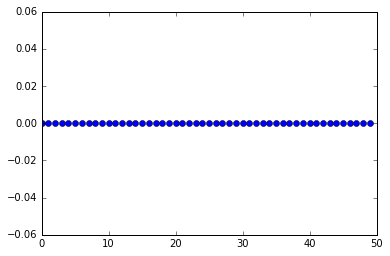

In [26]:
plt.plot(scoreSorted['id']-dataSorted['id'],'o')
plt.show()

In [27]:
error = pd.Series(scoreSorted['id']-dataSorted['id'])
error.nonzero()

(array([], dtype=int64),)

In [28]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn_pandas import gen_features
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

lr = LassoCV(alphas=[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10],cv = 3)#LinearRegression()#(fit_intercept = False)

FEATURESALL = ["bodyAngleZ",  "speed"]

mapper = DataFrameMapper([(FEATURESALL, preprocessing.StandardScaler())], input_df = True, sparse = True)

transformedData = mapper.fit_transform(data_all.copy())

In [29]:
EMOSCORES = ["happy_mu", "sadder_mu", "angrier_mu"]
EMOCONFIDENCE_INV = ["happy_sigma", "sadder_sigma", "angrier_sigma"]
min_confidence = 25/3 # true skill base confidence: http://trueskill.org/
EMOWTS = ["happy_wt", "sadder_wt", "angrier_wt"]

In [30]:
emotionid =0

WTS= {'happy_wt':(1.0-(design_df[EMOCONFIDENCE_INV[0]]/min_confidence)).values}
WTS_df = pd.DataFrame(WTS,design_df.index)
scores_WTS = pd.concat([design_df, WTS_df], axis = 1)

In [61]:
#test_size 
TT = 0.5

In [62]:
A = data["speed"].apply(lambda x: pow(x,2)) 
B = data["bodyAngleZ"].apply(lambda x: pow(x,3))
A_df = pd.DataFrame(A.values,data.index, columns =['A'])
B_df = pd.DataFrame(B.values,data.index, columns =["B"])

data_allAB = pd.concat([data, A_df, B_df], axis = 1,join_axes=[data.index])

mapperAB = DataFrameMapper([(["bodyAngleZ", "speed",  "A", "B"], preprocessing.StandardScaler())], input_df = True, sparse = True)
#mapperAB = DataFrameMapper([(["A", "B"], preprocessing.StandardScaler())], input_df = True, sparse = True)

transformedDataAB = mapperAB.fit_transform(data_allAB.copy())

X_trainAB, X_testAB, y_trainAB, y_testAB = model_selection.train_test_split(transformedDataAB, scores_WTS, test_size=TT, random_state=42)

# hack to check RF with AB features.. where A = speed^2 and B = angle^3
#X_train, X_test, y_train, y_test = model_selection.train_test_split(transformedDataAB, scores_WTS, test_size=0.3, random_state=42)

In [33]:
scores_WTS

happy_ts  happy_score   happy_mu  \
id                                                                       
0.0   trueskill.Rating(mu=30.769, sigma=1.919)    25.011340  30.768672   
1.0   trueskill.Rating(mu=19.411, sigma=1.786)    14.053339  19.411002   
2.0   trueskill.Rating(mu=20.106, sigma=1.773)    14.785949  20.106229   
3.0   trueskill.Rating(mu=33.951, sigma=1.831)    28.459388  33.950893   
4.0   trueskill.Rating(mu=18.950, sigma=1.846)    13.411377  18.950214   
5.0   trueskill.Rating(mu=41.340, sigma=2.118)    34.987785  41.340491   
6.0   trueskill.Rating(mu=11.673, sigma=2.052)     5.518650  11.673224   
7.0   trueskill.Rating(mu=27.668, sigma=1.660)    22.689576  27.668412   
8.0   trueskill.Rating(mu=21.245, sigma=1.769)    15.937212  21.244710   
9.0   trueskill.Rating(mu=25.961, sigma=1.689)    20.895278  25.961241   
10.0  trueskill.Rating(mu=14.721, sigma=1.922)     8.956149  14.721213   
11.0  trueskill.Rating(mu=39.334, sigma=1.892)    33.658721  39.333838   
12.0  trueskill.Rating(mu=30.093, sigma=1.676)    25.064249  30.093006   
13.0  trueskill.Rating(mu=16.235, sigma=1.892)    10.559037  16.234935   
14.0  trueskill.Rating(mu=27.320, sigma=1.710)    22.190312  27.319515   
15.0  trueskill.Rating(mu=11.203, sigma=1.997)     5.212513  11.202640   
16.0   trueskill.Rating(mu=7.005, sigma=2.153)     0.546787   7.004859   
17.0  trueskill.Rating(mu=41.703, sigma=1.979)    35.766601  41.702857   
18.0  trueskill.Rating(mu=31.584, sigma=1.693)    26.505969  31.583763   
19.0  trueskill.Rating(mu=36.182, sigma=1.840)    30.662469  36.181797   
20.0   trueskill.Rating(mu=8.215, sigma=2.113)     1.876812   8.215352   
21.0  trueskill.Rating(mu=44.109, sigma=2.170)    37.599647  44.108591   
22.0   trueskill.Rating(mu=4.830, sigma=2.221)    -1.832885   4.829794   
23.0  trueskill.Rating(mu=13.814, sigma=1.908)     8.089270  13.814174   
24.0   trueskill.Rating(mu=3.818, sigma=2.257)    -2.952829   3.817631   
25.0  trueskill.Rating(mu=34.634, sigma=1.759)    29.357433  34.634006   
26.0  trueskill.Rating(mu=13.091, sigma=1.929)     7.305346  13.091446   
27.0   trueskill.Rating(mu=6.631, sigma=2.172)     0.115771   6.630517   
28.0  trueskill.Rating(mu=10.270, sigma=2.073)     4.052179  10.270369   
29.0  trueskill.Rating(mu=30.981, sigma=1.682)    25.935608  30.981452   
30.0  trueskill.Rating(mu=37.296, sigma=1.880)    31.656746  37.295896   
31.0  trueskill.Rating(mu=46.947, sigma=2.195)    40.362531  46.946729   
32.0  trueskill.Rating(mu=22.893, sigma=1.647)    17.951379  22.892673   
33.0  trueskill.Rating(mu=24.435, sigma=1.646)    19.497664  24.434968   
34.0  trueskill.Rating(mu=25.199, sigma=1.660)    20.217964  25.198527   
35.0  trueskill.Rating(mu=15.831, sigma=1.844)    10.297814  15.830886   
36.0  trueskill.Rating(mu=23.822, sigma=1.686)    18.763284  23.822350   
37.0  trueskill.Rating(mu=32.773, sigma=1.697)    27.682580  32.773046   
38.0  trueskill.Rating(mu=22.184, sigma=1.718)    17.031800  22.184461   
39.0  trueskill.Rating(mu=39.605, sigma=1.857)    34.033224  39.605099   
40.0  trueskill.Rating(mu=29.765, sigma=1.682)    24.720183  29.765424   
41.0  trueskill.Rating(mu=20.505, sigma=1.744)    15.272721  20.504676   
42.0  trueskill.Rating(mu=33.664, sigma=1.710)    28.534411  33.663860   
43.0  trueskill.Rating(mu=28.971, sigma=1.700)    23.871656  28.971375   
44.0  trueskill.Rating(mu=41.769, sigma=1.931)    35.976846  41.769121   
45.0  trueskill.Rating(mu=46.186, sigma=2.160)    39.705094  46.186005   
46.0  trueskill.Rating(mu=17.188, sigma=1.829)    11.699831  17.187735   
47.0  trueskill.Rating(mu=38.636, sigma=1.870)    33.025471  38.635655   
48.0  trueskill.Rating(mu=48.524, sigma=2.186)    41.966839  48.523572   
49.0  trueskill.Rating(mu=26.469, sigma=1.682)    21.421751  26.469094   

      happy_sigma    id  happy_wt  
id                                 
0.0      1.919111   0.0  0.769707  
1.0      1.785888   1.0  0.785693  
2.0      1.773427   2.0  0.787189  
3.0      

In [63]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(transformedData, scores_WTS, test_size=TT, random_state=42)

In [64]:
from scipy.stats import spearmanr

In [65]:
LABEL = EMOSCORES[emotionid]
predicted_name ="predicted_"+LABEL

In [66]:
lr.fit(X_train, y_train[EMOSCORES[emotionid]])#,sample_weight=y_train[EMOWTS[emotionid]])

C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10], copy_X=True,
    cv=3, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

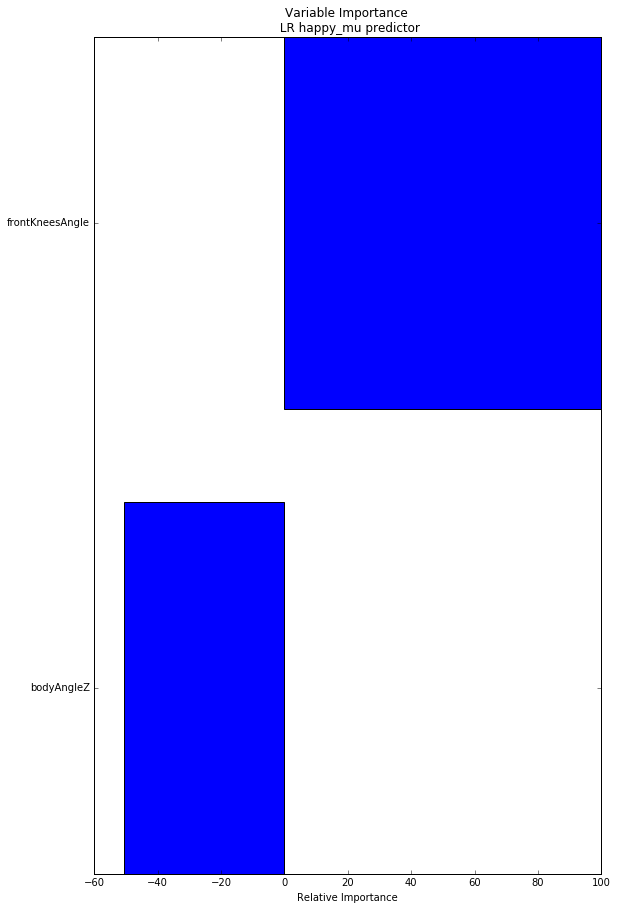

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# for AB features
#FEATURENAMES = np.array(["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "A", "B", "walk", "trot", "gallop", "dynamicWalk","walk2","walk2Longswing","walkLongswing"])
FEATURENAMES = np.array(["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "walk", "trot", "gallop", "dynamicWalk","walk2","walk2Longswing","walkLongswing"])
LABEL = EMOSCORES[emotionid]
# #############################################################################
# Plot feature importance
feature_importance =lr.coef_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) 
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,FEATURENAMES[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance \n LR ' + LABEL + ' predictor')
plt.show()

In [68]:
#lrAB =  LassoCV(alphas=[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10],cv = 3)#LinearRegression()#LinearRegression(fit_intercept =False)
lrAB = LinearRegression()#LinearRegression(fit_intercept =False)
lrAB.fit(X_trainAB, y_trainAB[EMOSCORES[emotionid]])#,sample_weight=y_trainAB[EMOWTS[emotionid]])
ytest_pred_lrAB=lrAB.predict(X_testAB)
ytrain_pred_lrAB=lrAB.predict(X_trainAB)

In [69]:
ytest_pred_lr=lr.predict(X_test)
ytrain_pred_lr=lr.predict(X_train)

In [70]:
ytest_pred_lr

array([ 17.90035698,  32.00090958,  33.58695773,  37.9511244 ,
        33.47669754,  41.42251448,  10.03133138,  34.90140347,
        26.82052653,  31.56781051,  28.95292012,  20.02041337,
        29.32364542,  28.8404781 ,  36.89722643,   9.41771286,
        26.05806596,  17.58847455,  33.34757921,  14.72042225,
        26.6034766 ,   7.68387862,   3.79401625,  29.28483956,  38.03947801])

In [71]:
ytest_pred_lrAB

array([ 17.33382889,  36.09840935,  35.92636263,  44.58018782,
        40.61008783,  46.79849271,  11.489899  ,  35.60958805,
        24.28077406,  35.42234556,  29.8989186 ,  19.07730791,
        30.87076988,  24.26310257,  36.05814062,  10.12278368,
        22.58798723,  17.33562241,  36.34597605,  11.14462451,
        25.01392262,   7.77149465,  -3.90751311,  25.6081778 ,  45.40370153])

In [72]:
print("Mean squared error LR wtd (test) AB: %.2f"
      % mean_squared_error( y_testAB[EMOSCORES[emotionid]],ytest_pred_lrAB,sample_weight=y_testAB[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score LR wtd (test) AB: %.4f' % r2_score( y_testAB[EMOSCORES[emotionid]],ytest_pred_lrAB,sample_weight=y_testAB[EMOWTS[emotionid]]))

Mean squared error LR wtd (test) AB: 4.72
Variance score LR wtd (test) AB: 0.9702


In [73]:
print("Mean squared error LR wtd (test): %.2f"
      % mean_squared_error( y_test[EMOSCORES[emotionid]],ytest_pred_lr,sample_weight=y_test[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score LR wtd (test): %.4f' % r2_score( y_test[EMOSCORES[emotionid]],ytest_pred_lr,sample_weight=y_test[EMOWTS[emotionid]]))

Mean squared error LR wtd (test): 22.19
Variance score LR wtd (test): 0.8600


In [74]:
print("Mean squared error wtd LR (train) AB: %.2f"
      % mean_squared_error( y_trainAB[EMOSCORES[emotionid]],ytrain_pred_lrAB,sample_weight=y_trainAB[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score wtd LR (train) AB: %.2f' % r2_score( y_trainAB[EMOSCORES[emotionid]],ytrain_pred_lrAB,sample_weight=y_trainAB[EMOWTS[emotionid]]))

Mean squared error wtd LR (train) AB: 2.08
Variance score wtd LR (train) AB: 0.98


In [75]:
print("Mean squared error wtd LR (train): %.2f"
      % mean_squared_error( y_train[EMOSCORES[emotionid]],ytrain_pred_lr,sample_weight=y_train[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score wtd LR (train): %.2f' % r2_score( y_train[EMOSCORES[emotionid]],ytrain_pred_lr,sample_weight=y_train[EMOWTS[emotionid]]))

Mean squared error wtd LR (train): 12.71
Variance score wtd LR (train): 0.89


In [76]:
y_hat_lr = pd.DataFrame(ytest_pred_lr, columns=[predicted_name], index=y_test[LABEL].index) 

y_all_testlr = pd.concat([y_hat_lr, y_test[LABEL], y_test[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_testlr_sorted = y_all_testlr.sort_values(EMOSCORES[emotionid],ascending=[True])

ytrain_hat_lr = pd.DataFrame(ytrain_pred_lr, columns=[predicted_name], index=y_train[LABEL].index) 

y_all_trainlr = pd.concat([ytrain_hat_lr, y_train[LABEL], y_train[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_trainlr_sorted = y_all_trainlr.sort_values(EMOSCORES[emotionid],ascending=[True])

In [77]:
y_hat_lrAB = pd.DataFrame(ytest_pred_lrAB, columns=[predicted_name], index=y_testAB[LABEL].index) 

y_all_testlrAB = pd.concat([y_hat_lrAB, y_testAB[LABEL], y_testAB[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_testlrAB_sorted = y_all_testlrAB.sort_values(EMOSCORES[emotionid],ascending=[True])

ytrain_hat_lrAB = pd.DataFrame(ytrain_pred_lrAB, columns=[predicted_name], index=y_trainAB[LABEL].index) 

y_all_trainlrAB = pd.concat([ytrain_hat_lrAB, y_trainAB[LABEL], y_trainAB[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_trainlrAB_sorted = y_all_trainlrAB.sort_values(EMOSCORES[emotionid],ascending=[True])

Populating the interactive namespace from numpy and matplotlib


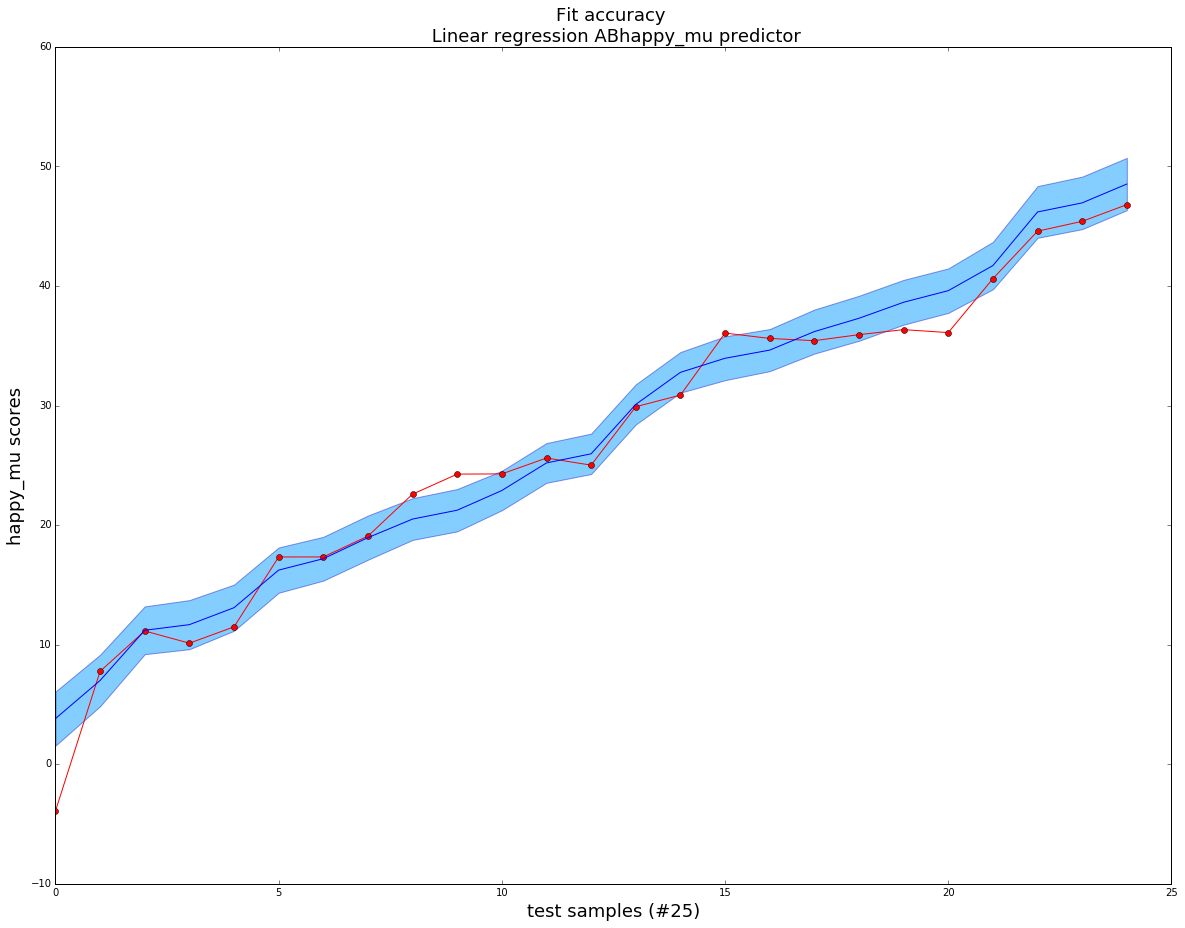

In [78]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_testlrAB_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_testlrAB_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_testlrAB_sorted[LABEL].values-y_all_testlrAB_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_testlrAB_sorted[LABEL].values+y_all_testlrAB_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_testlrAB_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression AB' + LABEL + ' predictor',fontsize=18)
plt.xlabel('test samples (#'+str(y_testAB[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

Populating the interactive namespace from numpy and matplotlib


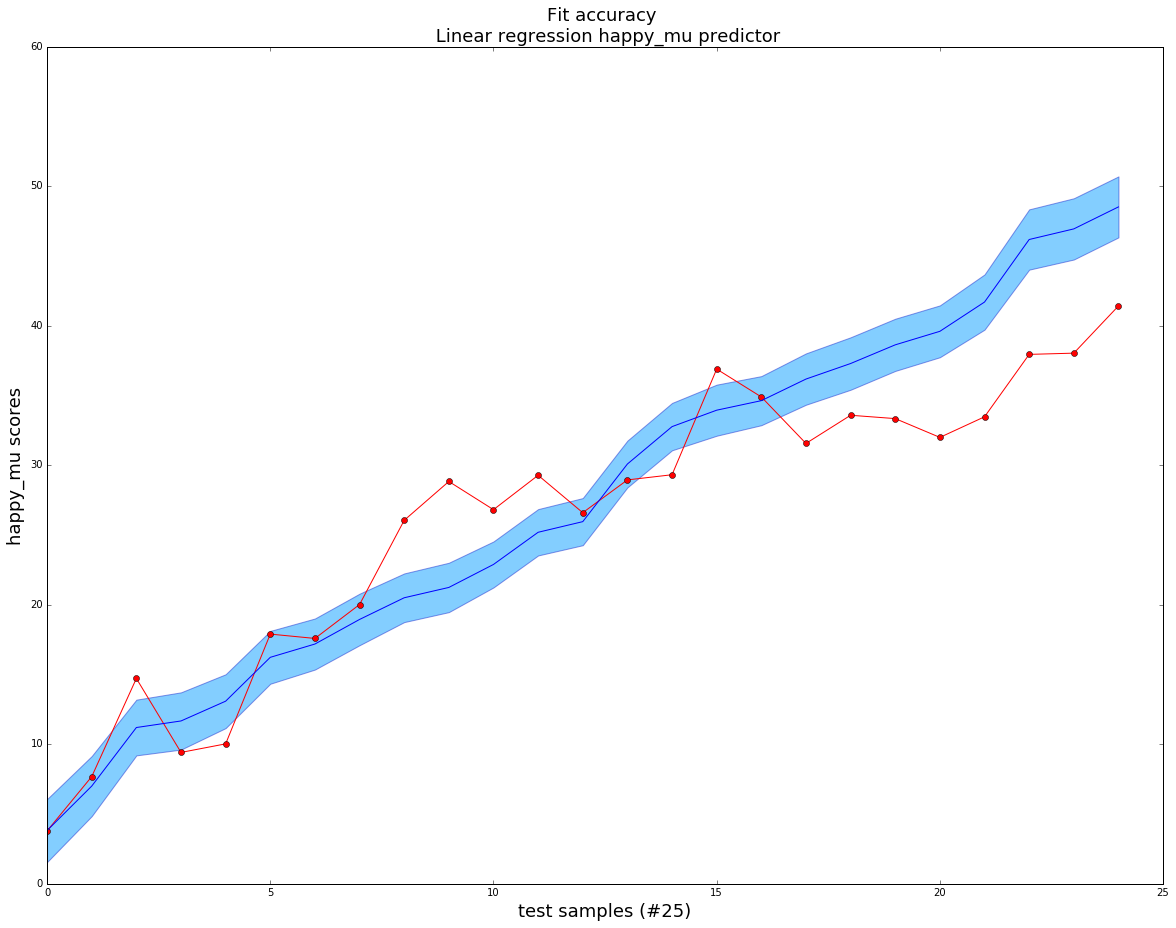

In [79]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_testlr_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_testlr_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_testlr_sorted[LABEL].values-y_all_testlr_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_testlr_sorted[LABEL].values+y_all_testlr_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_testlr_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('test samples (#'+str(y_test[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

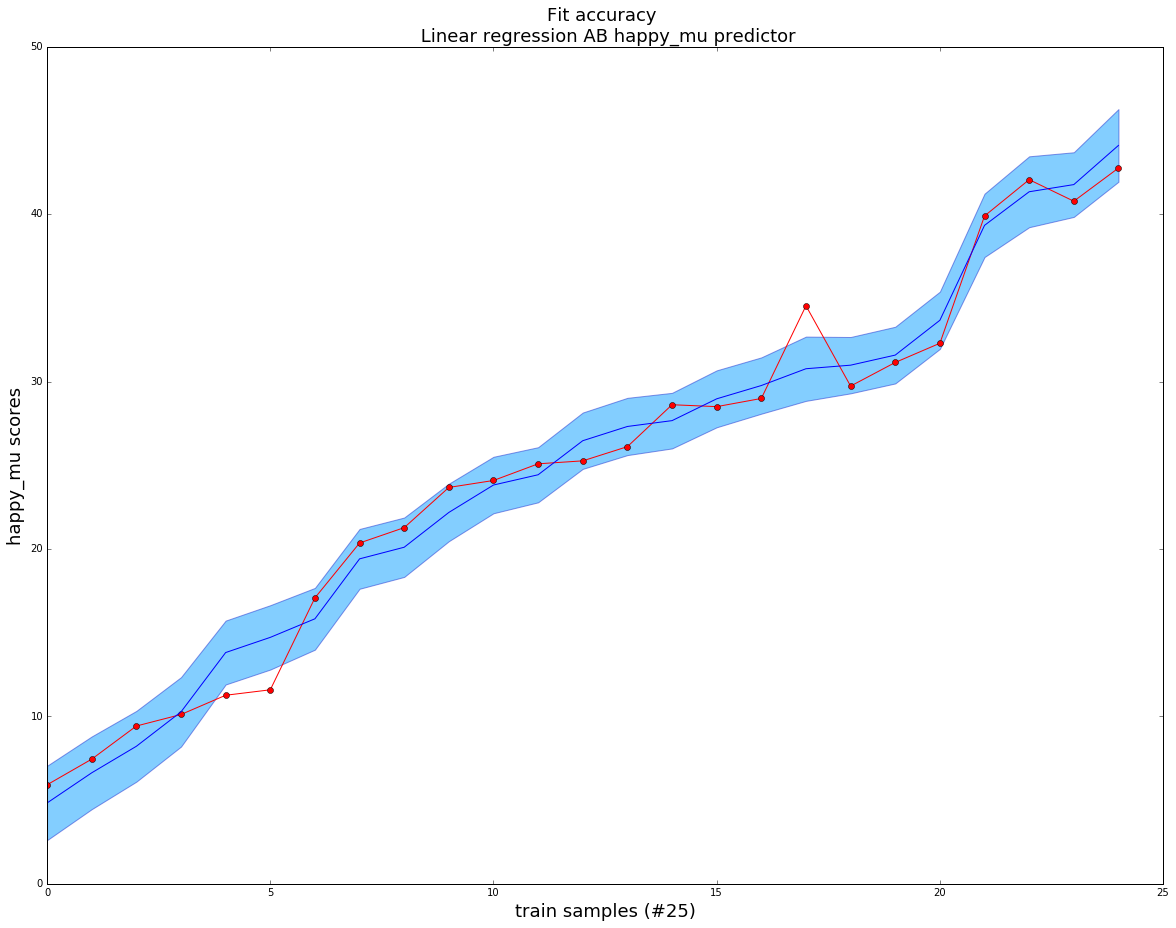

In [80]:
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_trainlrAB_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_trainlrAB_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_trainlrAB_sorted[LABEL].values-y_all_trainlrAB_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_trainlrAB_sorted[LABEL].values+y_all_trainlrAB_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_trainlrAB_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression AB ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('train samples (#'+str(y_trainAB[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

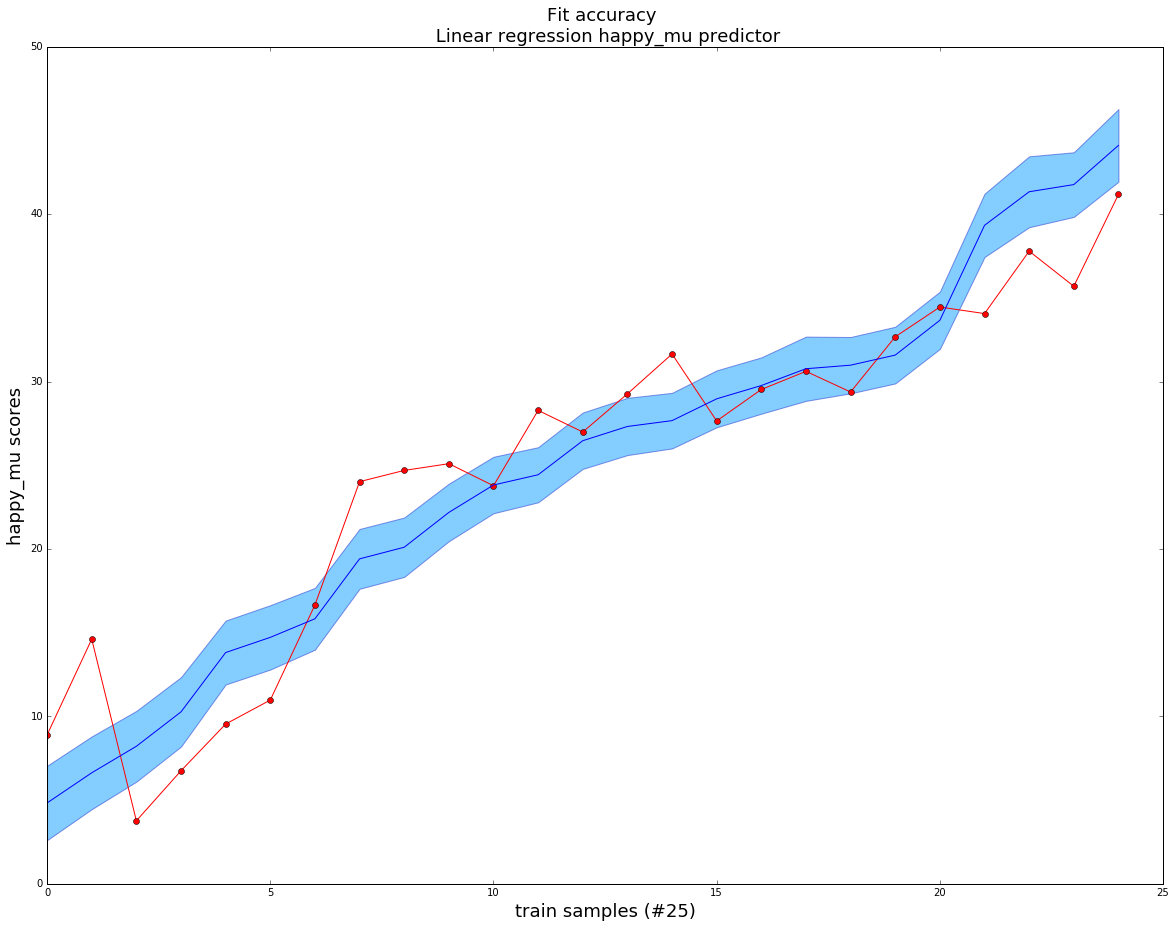

In [81]:
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_trainlr_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_trainlr_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_trainlr_sorted[LABEL].values-y_all_trainlr_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_trainlr_sorted[LABEL].values+y_all_trainlr_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_trainlr_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('train samples (#'+str(y_train[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

In [82]:
lrAB.coef_

array([ -0.96332697,   0.76948977,  10.61232595,  -6.17119148])

In [83]:
lr.coef_

array([-4.99343748,  9.89834992])